# 1 Data Exploration

In [14]:
import numpy as np
from skimage import io, transform
from keras.applications import inception_v3
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## Do Prediction Food Image 

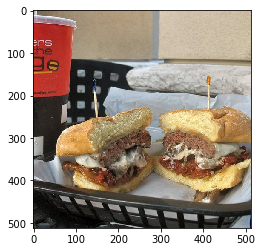

In [2]:
im = io.imread('../datasets/Food-5K/training/1_1.jpg')
plt.imshow(im)

In [3]:
# Do prediction
im_ = transform.resize(im, output_shape=(299, 299, 3), preserve_range=True)
im_ = inception_v3.preprocess_input(np.expand_dims(im_, axis=0))
model = inception_v3.InceptionV3(weights='imagenet')
p = model.predict(im_)
inception_v3.decode_predictions(p)

/home/can/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


[[(u'n07697313', u'cheeseburger', 0.96308976),
  (u'n07684084', u'French_loaf', 0.011202619),
  (u'n07697537', u'hotdog', 0.0038895516),
  (u'n07693725', u'bagel', 0.0031572832),
  (u'n02776631', u'bakery', 0.00084235816)]]

In [4]:
df = pd.read_json('../datasets/imagenet_class_index.json')
df = df.T.sort_index()
df.to_csv('../datasets/imagenet.csv', index=False)

## Average Image Size

In [11]:
# Filenames
f_root = '../datasets/Food-5K/training/'
filenames = os.listdir(f_root)
f_nonfood = [os.path.join(f_root, f) for f in filenames if f.startswith('0')]
f_food = [os.path.join(f_root, f) for f in filenames if f.startswith('1')]

In [39]:
# Nonfood images
size_nonfood = []
for f in tqdm(f_nonfood):
    im = io.imread(f)
    if len(im.shape) == 3:
        size_nonfood.append(list(im.shape))
size_nonfood = np.array(size_nonfood)
print 'size_nonfood.shape:', size_nonfood.shape

# Food images
size_food = []
for f in tqdm(f_food):
    im = io.imread(f)
    size_food.append(list(im.shape))
size_food = np.array(size_food)
print 'size_food.shape:', size_food.shape

  3%|▎         | 38/1500 [00:00<00:03, 377.95it/s]

size_nonfood.shape: (1492, 3)


100%|██████████| 1500/1500 [00:04<00:00, 362.55it/s]

size_food.shape: (1500, 3)


In [40]:
print 'Nonfood image sizes'
print np.mean(size_nonfood, axis=0)
print np.std(size_nonfood, axis=0)
print ''
print 'Food image sizes'
print np.mean(size_food, axis=0)
print np.std(size_food, axis=0)

Nonfood image sizes
[ 537.66487936  630.29959786    3.        ]
[ 213.0297976   246.61471655    0.        ]

Food image sizes
[ 464.476       486.44933333    3.        ]
[ 80.50944514  68.06108604   0.        ]


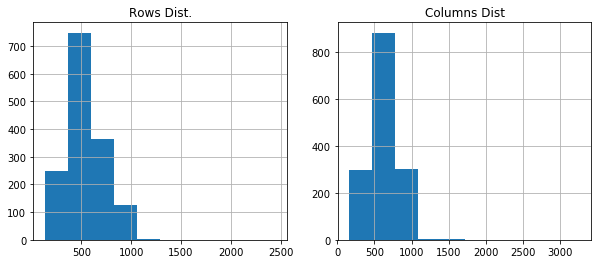

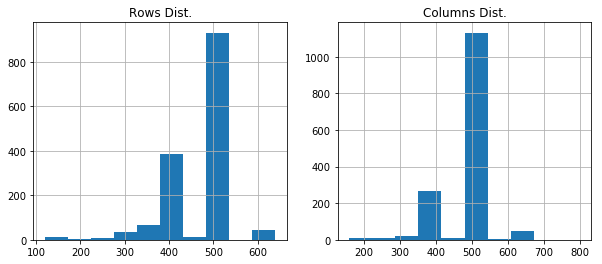

In [63]:
# Nonfood images
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1); pd.Series(size_nonfood[:,0]).hist(); plt.title('Rows Dist.')
plt.subplot(1,2,2); pd.Series(size_nonfood[:,1]).hist(); plt.title('Columns Dist')                                                             

# Food images
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1); pd.Series(size_food[:, 0]).hist(); plt.title('Rows Dist.')
plt.subplot(1,2,2); pd.Series(size_food[:, 1]).hist(); plt.title('Columns Dist.')